In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

In [3]:
heart = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Heart_Disease_Prediction_data.csv")
heart.head(10)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,Presence
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,Presence
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,Presence
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence


In [5]:
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [8]:
heart_df = heart.copy()
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [9]:
# Let's check if there is any Null value using isnull() method
heart_df.isnull().values.any()

False

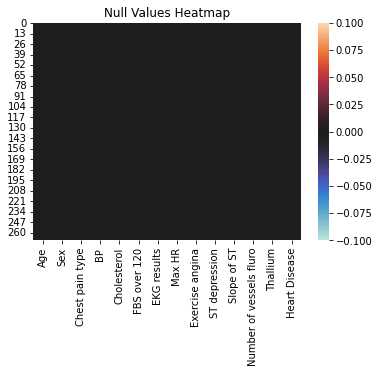

In [10]:
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

In [11]:
heart_df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [13]:
heart_df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [14]:
heart_df['Heart Disease'].value_counts()/heart_df.shape[0]*100

Absence     55.555556
Presence    44.444444
Name: Heart Disease, dtype: float64

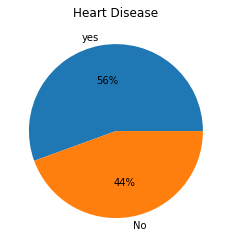

In [17]:
labels = ['yes', 'No']
values = heart_df['Heart Disease'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()


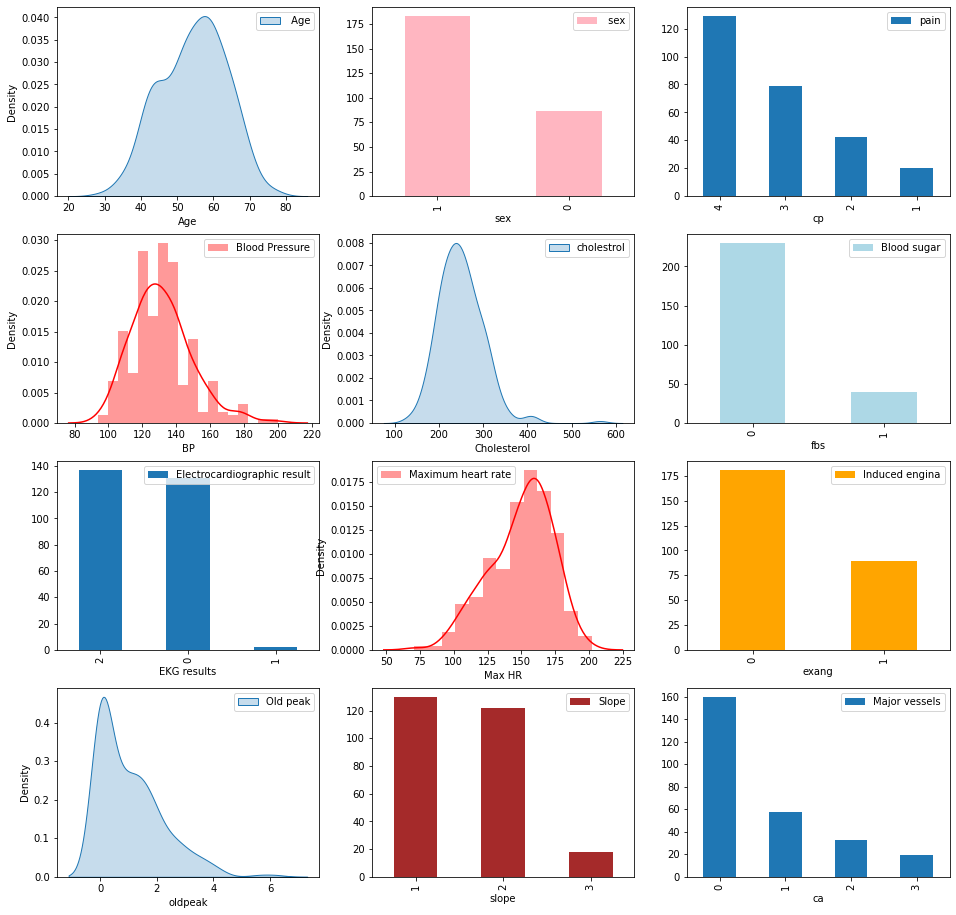

In [18]:
fig=plt.figure(figsize=(16, 16))
fig = plt.subplot(431)
sns.kdeplot(heart_df['Age'],shade=True,label=' Age')
# plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(432)
heart_df['Sex'].value_counts().plot(kind='bar',label=' sex', color="lightpink")
plt.xlabel('sex')
# plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(433)
heart_df['Chest pain type'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
# plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(434)
# sns.kdeplot(data['trtbps'],shade=True,label='blood pressure')
sns.distplot(heart_df['BP'], color="red",  kde= True,label='Blood Pressure')
# plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(435)
sns.kdeplot(heart_df['Cholesterol'],shade=True,label='cholestrol')
# plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(436)
heart_df['FBS over 120'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('fbs')
# plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(437)
heart_df['EKG results'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('EKG results')
# plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(438)
# sns.kdeplot(data['thalachh'],shade=True,label='Maximum heart rate')
sns.distplot(heart_df['Max HR'], color="red",  kde= True,label='Maximum heart rate')
# plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(439)
heart_df['Exercise angina'].value_counts().plot(kind='bar',label='Induced engina', color="orange")
plt.xlabel('exang')
# plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(4,3,10)
sns.kdeplot(heart_df['ST depression'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
# plt.title ('Distribution of old peak')
plt.legend()
fig = plt.subplot(4,3,11)
heart_df['Slope of ST'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('slope')
# plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(4,3,12)
heart_df['Number of vessels fluro'].value_counts().plot(kind='bar',label='Major vessels')
plt.xlabel('ca')
# plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

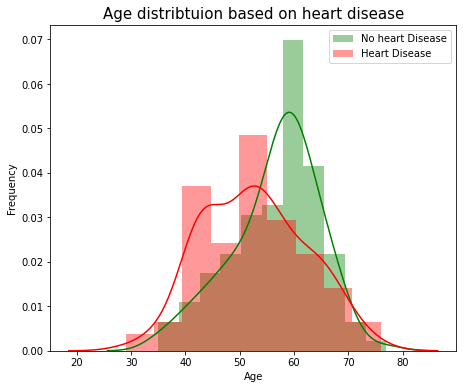

In [20]:
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(heart_df[heart_df['Heart Disease'] == 'Presence']["Age"], color='green',label='No heart Disease') 
sns.distplot(heart_df[heart_df['Heart Disease'] == 'Absence']["Age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()

In [21]:
print('Min age of people who do not have heart disease: ', min(heart_df[heart_df['Heart Disease'] == 'Presence']['Age']))
print('Max age of people who do not have heart disease: ', max(heart_df[heart_df['Heart Disease'] == 'Presence']['Age']))
print('Average age of people who do not have heart disease: ', heart_df[heart_df['Heart Disease'] == 'Presence']['Age'].mean())

Min age of people who do not have heart disease:  35
Max age of people who do not have heart disease:  77
Average age of people who do not have heart disease:  56.59166666666667


In [23]:
print('Min age of people who have heart disease: ', min(heart_df[heart_df['Heart Disease'] == 'Absence']['Age']))
print('Max age of people who have heart disease: ', max(heart_df[heart_df['Heart Disease'] == 'Absence']['Age']))
print('Average age of people who have heart disease: ', heart_df[heart_df['Heart Disease'] == 'Absence']['Age'].mean())

Min age of people who have heart disease:  29
Max age of people who have heart disease:  76
Average age of people who have heart disease:  52.70666666666666


In [62]:

dict={'Chest pain type':'cp','FBS over 120':'fbs','EKG results':'restecg','Max HR':'thalach','Exercise angina':'exang',
      'Slope of ST':'slope','Number of vessels fluro':'ca',
'Heart Disease':'target'}
heart_df.rename(columns=dict,inplace=True)

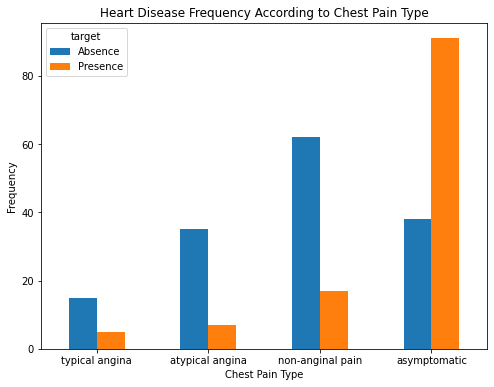

In [38]:
pd.crosstab(heart_df.cp,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

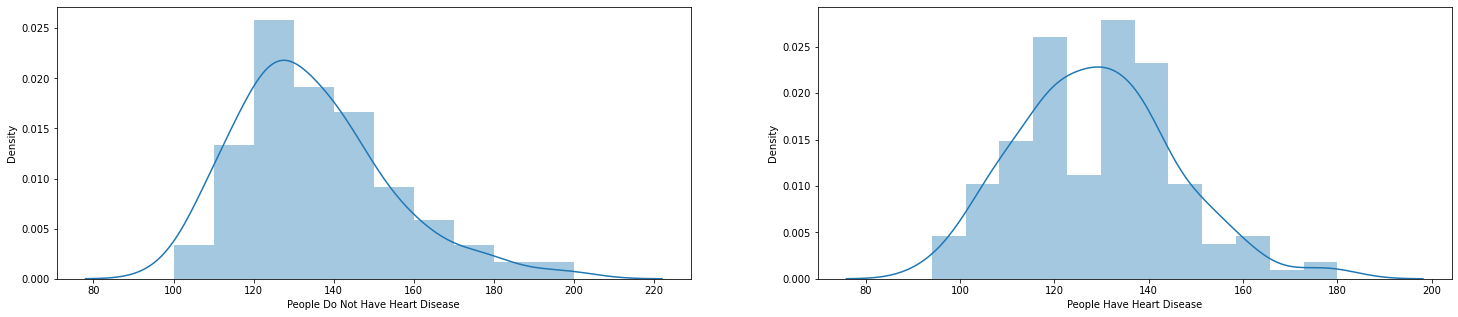

In [40]:
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 'Presence']['BP'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 'Absence']['BP'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [42]:
print('Min blood pressure of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 'Presence']['BP']))
print('Max blood pressure of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 'Presence']['BP']))
print('Average blood pressure of people who do not have heart disease: ', heart_df[heart_df['target'] == 'Presence']['BP'].mean())

Min blood pressure of people who do not have heart disease:  100
Max blood pressure of people who do not have heart disease:  200
Average blood pressure of people who do not have heart disease:  134.44166666666666


In [56]:
print('Min blood pressure of people who have heart disease: ', min(heart_df[heart_df['target'] == 'Absence']['BP']))
print('Max blood pressure of people who have heart disease: ', max(heart_df[heart_df['target'] == 'Absence']['BP']))
print('Average blood pressure of people who have heart disease: ', heart_df[heart_df['target'] == 'Absence']['BP'].mean())

Min blood pressure of people who have heart disease:  94
Max blood pressure of people who have heart disease:  180
Average blood pressure of people who have heart disease:  128.86666666666667


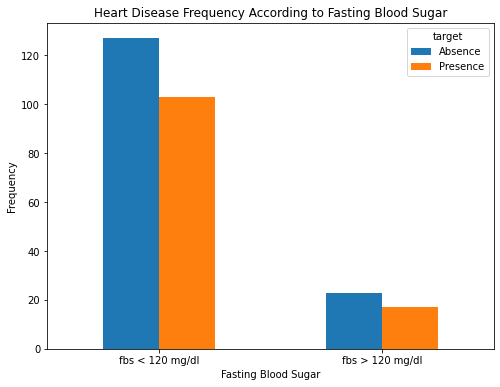

In [45]:
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

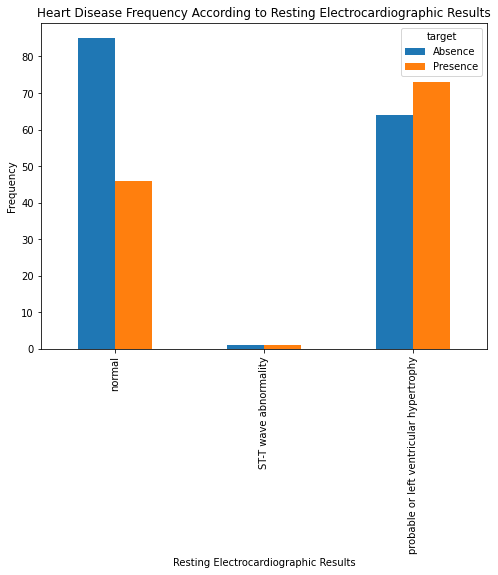

In [49]:
pd.crosstab(heart_df.restecg,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()


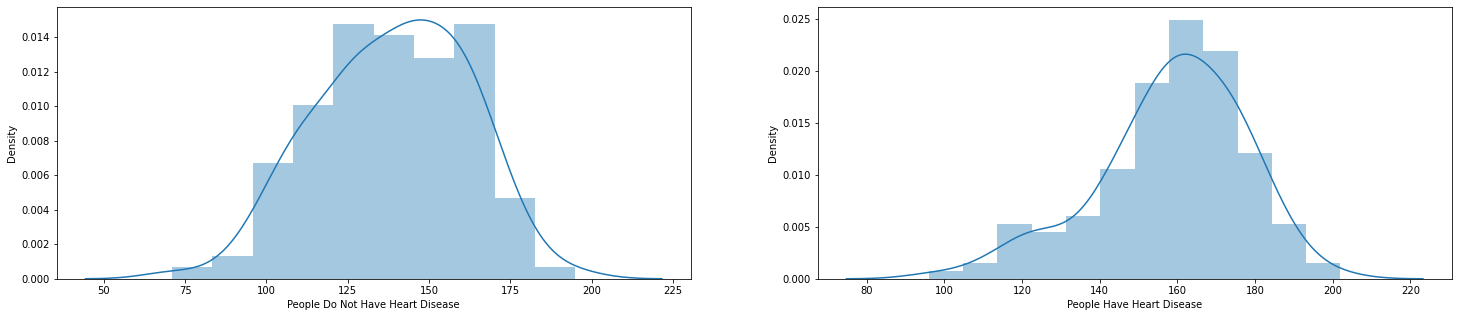

In [53]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 'Presence']['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 'Absence']['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

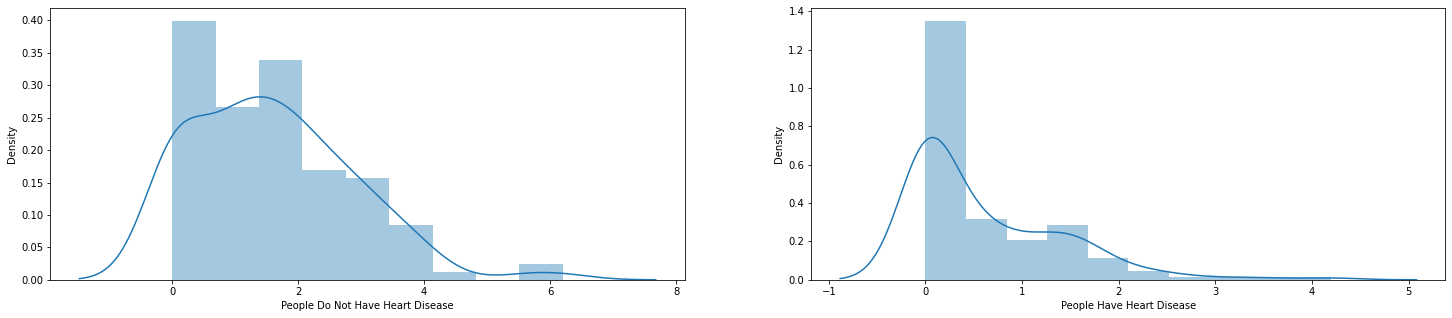

In [54]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 'Presence']['ST depression'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 'Absence']['ST depression'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

Min ST depression of people who do not have heart disease:  0.0
Max ST depression of people who do not have heart disease:  6.2
Average ST depression of people who do not have heart disease:  1.5841666666666667
Min ST depression of people who have heart disease:  0.0
Max ST depression of people who have heart disease:  4.2
Average ST depression of people not have heart disease:  0.6226666666666667


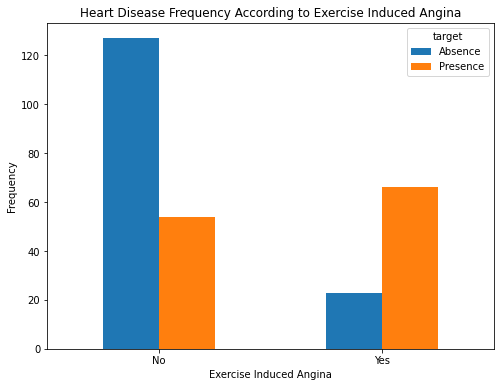

In [57]:
print('Min ST depression of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 'Presence']['ST depression']))
print('Max ST depression of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 'Presence']['ST depression']))
print('Average ST depression of people who do not have heart disease: ', heart_df[heart_df['target'] == 'Presence']['ST depression'].mean())

# Get min, max and average of the ST depression of the people have heart diseas
print('Min ST depression of people who have heart disease: ', min(heart_df[heart_df['target'] == 'Absence']['ST depression']))
print('Max ST depression of people who have heart disease: ', max(heart_df[heart_df['target'] == 'Absence']['ST depression']))
print('Average ST depression of people not have heart disease: ', heart_df[heart_df['target'] == 'Absence']['ST depression'].mean())


pd.crosstab(heart_df.exang,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

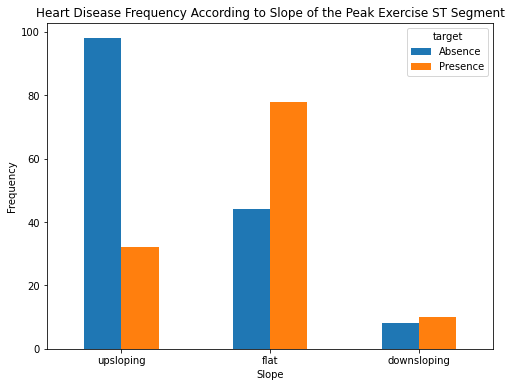

In [60]:
pd.crosstab(heart_df.slope,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

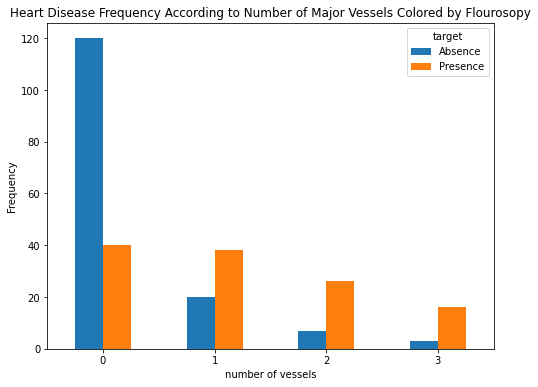

In [63]:
pd.crosstab(heart_df.ca,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

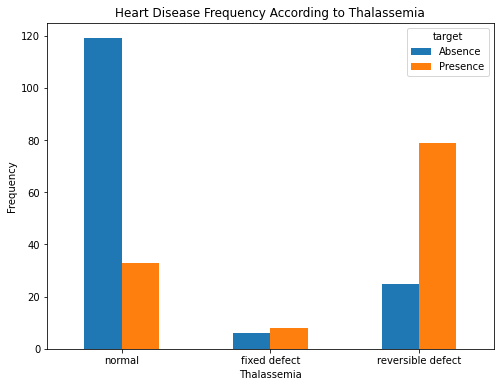

In [65]:
pd.crosstab(heart_df.Thallium,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

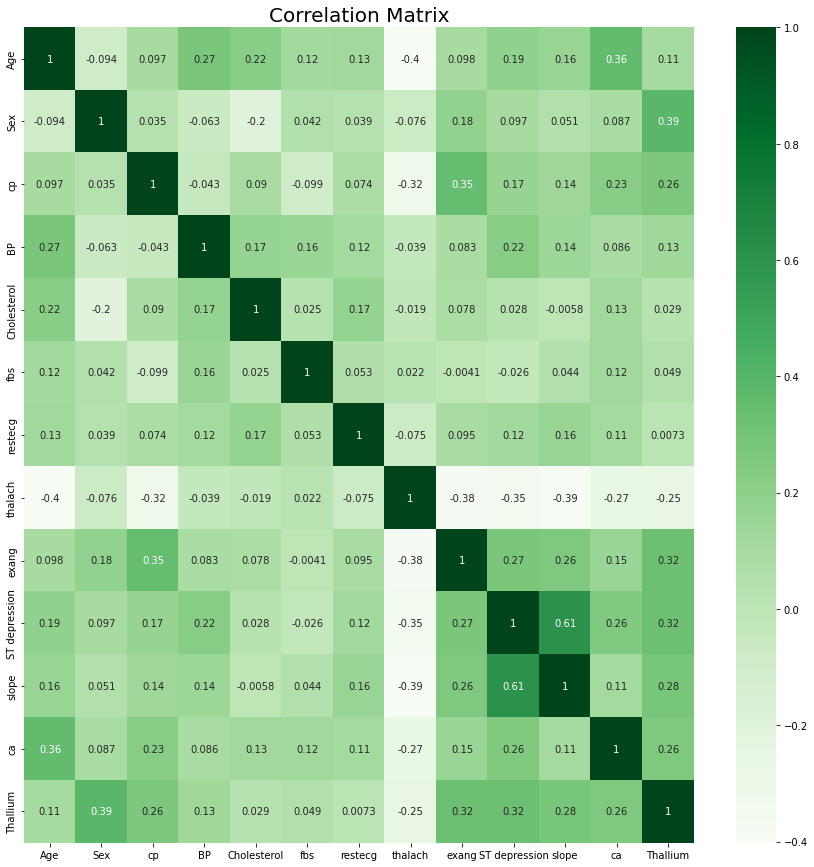

In [66]:
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(heart_df.corr(), annot = True, cmap = "Greens")
plt.show()

In [67]:
x= heart_df.drop(columns= 'target')
y= heart_df.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)


# creating Logistic Regression Model
LR_model= LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

X_train size: (202, 13), X_test size: (68, 13)
Classification Report
               precision    recall  f1-score   support

     Absence       0.89      0.82      0.86        40
    Presence       0.77      0.86      0.81        28

    accuracy                           0.84        68
   macro avg       0.83      0.84      0.84        68
weighted avg       0.84      0.84      0.84        68

Accuracy: 83.82%



In [68]:
cm = confusion_matrix(y_test, y_pred_LR)


# creating Knn Model
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

     Absence       0.84      0.90      0.87        40
    Presence       0.84      0.75      0.79        28

    accuracy                           0.84        68
   macro avg       0.84      0.82      0.83        68
weighted avg       0.84      0.84      0.84        68

Accuracy: 83.82%



In [69]:
cm = confusion_matrix(y_test, y_pred_knn)


SVC_model= SVC()
SVC_model.fit(x_train_scaler, y_train)
y_pred_SVC= SVC_model.predict(x_test_scaler)
SVC_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_SVC))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_SVC)*100),2)))

Classification Report
               precision    recall  f1-score   support

     Absence       0.87      0.82      0.85        40
    Presence       0.77      0.82      0.79        28

    accuracy                           0.82        68
   macro avg       0.82      0.82      0.82        68
weighted avg       0.83      0.82      0.82        68

Accuracy: 82.35%



In [72]:
cm = confusion_matrix(y_test, y_pred_SVC)

cm
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

Classification Report
               precision    recall  f1-score   support

     Absence       0.84      0.93      0.88        40
    Presence       0.88      0.75      0.81        28

    accuracy                           0.85        68
   macro avg       0.86      0.84      0.84        68
weighted avg       0.85      0.85      0.85        68

Accuracy: 85.29%



In [71]:
cm = confusion_matrix(y_test, y_pred_RF)
cm


DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)

print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))
cm = confusion_matrix(y_test, y_pred_DT)

Classification Report
               precision    recall  f1-score   support

     Absence       0.76      0.65      0.70        40
    Presence       0.59      0.71      0.65        28

    accuracy                           0.68        68
   macro avg       0.68      0.68      0.67        68
weighted avg       0.69      0.68      0.68        68

Accuracy: 67.65%

